In [134]:
"""
Check all datasets
"""
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
from ipywidgets import interact
from ipywidgets import Controller

from collections import defaultdict
import numpy as np
import os
from os.path import join
import sys
import itertools
from tqdm import tqdm
import pandas as pd
from pprint import pprint
import regex as re
from sklearn.metrics import pairwise_distances
sys.path.append('/export/home/asanakoy/workspace/neural_network')
sys.path.append('/export/home/asanakoy/workspace/art_datasets')
sys.path.append('/export/home/asanakoy/workspace/dataset_merger')
import make_data.dataset
import wikiart.info.preprocess_info
from art_utils.pandas_tools import is_null_object
from art_utils.text_tools import extract_all_years
import dataset_merger.read_datasets
import dataset_merger.pymongoext as pymongoext
from dataset_merger.match_artists import fix_sim_matrix
from dataset_merger.match_artists import generate_matches_for_manual_check
from dataset_merger.match_artists import get_num_top_matches
from dataset_merger.match_artists import compute_sim_matrix
from dataset_merger.match_artists import find_connected_components
from dataset_merger.match_artists import combine_artists
from dataset_merger.match_artists import get_merged_artists_df
import dataset_merger.prepare_artists as prepare_artists
from dataset_merger.prepare_artists import get_artists_with_years
import art_datasets.read
from eval.feature_extractor_tf import FeatureExtractorTf


pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 50)  
pd.set_option('display.max_columns', None) 

# todo: merge wga, wikiart, artuk, googleart (dates checked)
# todo: make uniform dates (bio or active if no bio available) range for every artist in the dataset

# todo: check dates on others
# todo: chach should we split naems on `&` for other datasets (beyound artuk, wikiart, googleart, wga)
# TOD: manually check connected components (wga, artuk) 

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 632 ms


In [143]:
datasets = ['wiki', 'googleart', 'wga', 'meisterwerke']
dfs = dataset_merger.read_datasets.read_datasets(datasets)

wiki
wiki 132296
googleart
googleart 105963
wga
wga 35884
meisterwerke
meisterwerke 19647
Total works count: 293790
time: 8.61 s


In [136]:
artists_with_years_dict = dict()
artists_with_years_dict['googleart'] = get_artists_with_years('googleart', dfs)
artists_with_years_dict['wiki'] = get_artists_with_years('wiki', dfs)
artists_with_years_dict['wga'] = get_artists_with_years('wga', dfs)
artists_with_years_dict['meisterwerke'] = get_artists_with_years('meisterwerke', dfs)

100%|██████████| 4445/4445 [00:00<00:00, 53959.26it/s]

with url_wiki: 3202
4445
4380



100%|██████████| 2276/2276 [00:00<00:00, 57064.00it/s]


2276
2270


100%|██████████| 4727/4727 [00:00<00:00, 47912.02it/s]


4727
4727


100%|██████████| 2294/2294 [00:00<00:00, 33895.34it/s]

2294
2182
Discarded 17 unknown artists
time: 4.51 s


In [137]:
dataset_name = '+'.join(datasets)
artists_df = pd.read_hdf('/export/home/asanakoy/workspace/dataset_merger/aggregated/artists_{}_v0.9.hdf5'.format(dataset_name))
artists_df

,artist_ids,artist_name,bio,names,page_url,url_wiki,works_count,years,years_bio,years_range,years_work,artist_id
artist_id,,,,,,,,,,,,
wiki_3d,[wiki_3d],3d,NaN,"[robert del naja, 3d]",NaN,https://en.wikipedia.org/wiki/robert_del_naja,10,"[1984.0, 1986.0, 1988.0, 1991.0, 1994.0, 1983.0]","[1966, 2099]","[1966, 2099]","[1983.0, 1994.0]",wiki_3d
wiki_a-y-jackson,[wiki_a-y-jackson],a y jackson,NaN,"[a y jackson, alexander young jackson, a.y. ja...",NaN,https://en.wikipedia.org/wiki/a._y._jackson,30,"[1920.0, 1953.0, 1921.0, 1923.0, 1926.0, 1927....","[1882, 1974]","[1882, 1974]","[1910.0, 1953.0]",wiki_a-y-jackson
wiki_abanindranath-tagore,"[wiki_abanindranath-tagore, googleart_m0632pc]",abanindranath tagore,Abanindranath Tagore was the principal artist ...,[abanindranath tagore],[https://www.google.com/culturalinstitute/beta...,https://en.wikipedia.org/wiki/abanindranath_ta...,138,"[1920.0, 1924.0, 1927.0, 1929.0, 1930.0, 1938....","[1871, 1951]","[1871, 1951]","[1897.0, 1939.0]",wiki_abanindranath-tagore
wiki_abdul-qader-al-raes,[wiki_abdul-qader-al-raes],abdul qader al raes,NaN,[abdul qader al raes],NaN,https://en.wikipedia.org/wiki/abdul_qader_al_rais,17,"[2008.0, 2011.0, 1998.0, 1995.0, 2007.0]","[1951, 2099]","[1951, 2099]","[1995.0, 2011.0]",wiki_abdul-qader-al-raes
wiki_abdullah-suriosubroto,[wiki_abdullah-suriosubroto],abdullah suriosubroto,NaN,[abdullah suriosubroto],NaN,https://id.wikipedia.org/wiki/abdullah_suriosu...,18,NaN,"[1878, 1941]","[1878, 1941]",NaN,wiki_abdullah-suriosubroto
wiki_abidin-dino,[wiki_abidin-dino],abidin dino,NaN,[abidin dino],NaN,https://en.wikipedia.org/wiki/abidin_dino,54,"[1955.0, 1956.0, 1989.0, 1990.0, 1961.0, 1930....","[1913, 1993]","[1913, 1993]","[1930.0, 1993.0]",wiki_abidin-dino
wiki_abraham-manievich,[wiki_abraham-manievich],abraham manievich,NaN,"[abraham manievich, абрам маневич]",NaN,https://en.wikipedia.org/wiki/abraham_a._manie...,53,"[1921.0, 1923.0, 1925.0, 1937.0, 1929.0, 1930....","[1881, 1941]","[1881, 1941]","[1905.0, 1939.0]",wiki_abraham-manievich
wiki_abraham-palatnik,[wiki_abraham-palatnik],abraham palatnik,NaN,[abraham palatnik],NaN,https://en.wikipedia.org/wiki/abraham_palatnik,3,[1965.0],"[1928, 2099]","[1928, 2099]","[1965.0, 1965.0]",wiki_abraham-palatnik
wiki_abraham-van-strij,"[wiki_abraham-van-strij, wga_strij, abraham va...",abraham van strij,NaN,"[abraham van strij, strij, abraham van, i]",NaN,https://en.wikipedia.org/wiki/abraham_van_strij,45,"[1800.0, 1825.0, 1810.0]","[1753, 1826]","[1753, 1826]","[1800.0, 1825.0]",wiki_abraham-van-strij


time: 559 ms


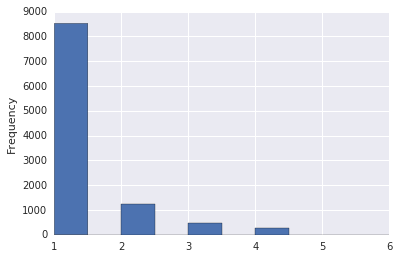

time: 216 ms


In [138]:
artists_df['artist_ids'].apply(len).plot.hist()

In [141]:
import deepdish as dd
unique_image_handles = dd.io.load('/export/home/asanakoy/tmp/dataset_merger_res_test/unique_images_per_artist.h5')
print len(unique_image_handles)

time: 2.55 s


In [128]:
def browse_images(image_groups):
    def view_image(df, image_id):
        obj = df.loc[image_id].to_dict()
        if 'artist_name' not in obj:
            obj['artist_name'] = obj['artist_slug']
        else:
            pass
#             print obj['artist_name']
#         print obj
        if is_null_object(obj['title']):
            obj['title'] = ''
        im = plt.imread(obj['image_path'])
        plt.imshow(im, interpolation=None)
        plt.title(unicode(obj['image_id']))
        plt.grid(False)
    
    k = len(image_groups)
    plt.figure(figsize=(20, 5 * k))
    for row_idx, img_group in enumerate(image_groups[:k]):
        for i, handle in enumerate(img_group):
#             print len(img_group)
            df = dfs[handle[0]]
            assert len(img_group) < 10, len(img_group) 
            plt.subplot(k, len(img_group), len(img_group) * row_idx + 1 + i)
            view_image(df, handle[1])
    if k > 12: 
        plt.savefig('/export/home/asanakoy/tmp/1.png')
        plt.close()
    else:
        plt.show()
            

time: 26.7 ms


In [147]:
artworks_df = pd.read_hdf('/export/home/asanakoy/workspace/dataset_merger/aggregated/artworks_wiki+googleart+wga+meisterwerke_v0.9.hdf5')
artworks_df

,artist_id,artist_name,artwork_slug,century,city,classification,collection,date,description,dimensions,form,genre,image_id,image_path,image_url,keywords,list_of_styles,location,location_created,media,medium,nationality,object_type,page_url,school,size,source,style,subject,technique,theme,timeline,title,title_original,type,url,year,years_range
image_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
jacek-yerka_13-xii-1981-forever-1985,wiki_jacek-yerka,jacek yerka,13-xii-1981-forever-1985,20,NaN,NaN,NaN,1985,NaN,NaN,NaN,symbolic,jacek-yerka_13-xii-1981-forever-1985,/export/home/asanakoy/workspace/wikiart/images...,http://uploads7.wikiart.org/images/jacek-yerka...,"[ martial-law-in-poland, martial-law-in-poland...",[surrealism],NaN,NaN,"[acrylic, canvas]",NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/13-xii-1...,NaN,NaN,wiki,surrealism,NaN,acrylic,NaN,NaN,13 xii 1981 forever,NaN,NaN,NaN,1985.0,"[1952, 2099]"
jacek-yerka_a-door,wiki_jacek-yerka,jacek yerka,a-door,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,symbolic,jacek-yerka_a-door,/export/home/asanakoy/workspace/wikiart/images...,http://uploads6.wikiart.org/images/jacek-yerka...,"[allegories-and-symbols, doors-and-windows, d...",[surrealism],NaN,NaN,NaN,NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/a-door,NaN,NaN,wiki,surrealism,NaN,NaN,NaN,NaN,a door,NaN,NaN,NaN,NaN,"[1952, 2099]"
jacek-yerka_a-street-2006,wiki_jacek-yerka,jacek yerka,a-street-2006,20,NaN,NaN,NaN,2006,NaN,NaN,NaN,landscape,jacek-yerka_a-street-2006,/export/home/asanakoy/workspace/wikiart/images...,http://uploads4.wikiart.org/images/jacek-yerka...,"[ lanterns, lanterns, streets-and-squares]",[surrealism],NaN,NaN,"[paper, pastel]",NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/a-street...,NaN,NaN,wiki,surrealism,NaN,pastel,NaN,NaN,street,NaN,NaN,NaN,2006.0,"[1952, 2099]"
jacek-yerka_afternoon-with-the-bros-grimm-1990,wiki_jacek-yerka,jacek yerka,afternoon-with-the-bros-grimm-1990,20,NaN,NaN,NaN,1990,NaN,NaN,NaN,interior,jacek-yerka_afternoon-with-the-bros-grimm-1990,/export/home/asanakoy/workspace/wikiart/images...,http://uploads8.wikiart.org/images/jacek-yerka...,"[ fields-and-plains, fields-and-plains, studio...",[surrealism],NaN,NaN,NaN,NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/afternoo...,NaN,NaN,wiki,surrealism,NaN,NaN,NaN,NaN,afternoon with the bros grimm,NaN,NaN,NaN,1990.0,"[1952, 2099]"
jacek-yerka_alarm-clock-eater-2004,wiki_jacek-yerka,jacek yerka,alarm-clock-eater-2004,20,NaN,NaN,NaN,2004,NaN,NaN,NaN,animal,jacek-yerka_alarm-clock-eater-2004,/export/home/asanakoy/workspace/wikiart/images...,http://uploads5.wikiart.org/images/jacek-yerka...,"[clocks-and-hourglasses, fantastic-animals, f...",[surrealism],NaN,NaN,"[cardboard, pencil]",NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/alarm-cl...,NaN,NaN,wiki,surrealism,NaN,pencil,NaN,NaN,alarm clock eater,NaN,NaN,NaN,2004.0,"[1952, 2099]"
jacek-yerka_alarm-clock-wandering-seller,wiki_jacek-yerka,jacek yerka,alarm-clock-wandering-seller,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,animal,jacek-yerka_alarm-clock-wandering-seller,/export/home/asanakoy/workspace/wikiart/images...,http://uploads1.wikiart.org/images/jacek-yerka...,"[allegories-and-symbols, roads-and-vehicles, ...",[surrealism],NaN,NaN,NaN,NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/alarm-cl...,NaN,NaN,wiki,surrealism,NaN,NaN,NaN,NaN,alarm clock wandering seller,NaN,NaN,NaN,NaN,"[1952, 2099]"
jacek-yerka_alley-2004,wiki_jacek-yerka,jacek yerka,alley-2004,20,NaN,NaN,NaN,2004,NaN,NaN,NaN,cityscape,jacek-yerka_alley-2004,/export/home/asanakoy/workspace/wikiart/images...,http://uploads1.wikiart.org/images/jacek-yerka...,"[ fantastic-cities, fantastic-cities, mountai...",[surrealism],NaN,NaN,NaN,NaN,polish,NaN,http://www.wikiart.org/en/jacek-yerka/alley-2004,NaN,NaN,wiki,surrealism,NaN,NaN,NaN,NaN,alley,NaN,NaN,NaN,2004.0,"[1952, 2099]"
jacek-yerka_amazon-clock-maker,wiki_jacek-yerka,jacek yerka,amazon-clock-maker,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,symbolic,jacek-yerka_amazon-clock-maker,/export/

time: 13.6 s


In [150]:
tmp = artworks_df['artist_id'].value_counts()

time: 55 ms


In [159]:
print len(tmp), tmp.sum()
print len(tmp[tmp >= 50]), tmp[tmp >= 50].sum()


10509 274222
1038 195303
time: 5.9 ms
